# Project 3: Predictive modeling
*University of Ljubljana, Faculty for computer and information science* <br />
*Course: Introduction to data science*

In this Jupyter notebook you should document all the analyses (tables, figures, models) you have perfomed to write your report.

All the code in the notebook must be reproducible and runnable, so include instructions for the environment setup or other specifics needed to run the notebook.

## Environment setup

Write instructions how to setup the environment to run this notebook, which libraries are installed, etc. Also provide installation sources.

`ENVIRONMENT SETUP:

- conda create --name project_3

- conda install python=3.7

- conda install jupyter notebook

- ipython kernel install --name project_3 --user

- conda install pandas

- conda install numpy

- conda install matplotlib

- conda install scipy

- conda install seaborn

- conda install scikit-learn`

In [1]:
# Load all the libraries needed for running the code chunks below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from matplotlib.pyplot import figure
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB





os. getcwd() #get current work dir

'C:\\Users\\zaloz\\Desktop\\exFMF\\upd\\project-3-databox-ZaloznikV'

# Modeling

Your main task is to provide insights into the data to the reader through text, tables, models and visualizations. Aim for a concise, efficient, and effective solution.

In [2]:
signups = pd.read_csv("Data\signups\SignupsAttributes.csv")
events = pd.read_csv("Data\events\AllEvents.csv", error_bad_lines=False) #automatically ignoring headers in all_events csv file
#print(signups.head())
#events.head()

C:\Users\zaloz\anaconda3\envs\project_3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 7878587: expected 4 fields, saw 7\nSkipping line 7888587: expected 4 fields, saw 9\nSkipping line 7898587: expected 4 fields, saw 7\nSkipping line 7918587: expected 4 fields, saw 7\nSkipping line 7928587: expected 4 fields, saw 7\nSkipping line 7938587: expected 4 fields, saw 7\n'


In [3]:
signups.describe(include="all")


,$distinct_id,$properties.space_id,$properties.country,$properties.is_agency,$properties.company_created,$properties.became_paying,$properties.became_pql,$properties.cancelled,$properties.had_trial,$properties.trial_features,...,$properties.level_achieved,$properties.has_mobile_company,$properties.sessions_company,$properties.databoards_company,$properties.cloud_sources_company,$properties.metrics_company,$properties.users_in_space,$properties.scheduled_snapshots_company,$properties.custom_queries_company,$properties.scripts_company
count,101698.000000,101698.000000,101698,101698,101698,101698,101698,101698,101698,101137,...,101698,101698,101698.000000,101698.000000,101698.000000,101698.000000,101698.000000,101698.000000,101698.000000,101698.000000
unique,NaN,NaN,307,2,94805,2816,9994,1155,2,259,...,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,United States,False,2020-12-03T12:51:00,undefined,undefined,undefined,False,undefined,...,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,25502,86645,19,98748,91187,100542,83678,83795,...,44611,93584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,209132.380568,209132.380568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.676316,1.094535,1.172294,3.985113,1.131291,0.044131,0.846437,0.363173
std,39480.787415,39480.787415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,88.293682,3.083744,2.708625,9.701362,0.755802,0.383822,12.146176,5.919391
min,142846.000000,142846.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,174966.250000,174966.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,207723.500000,207723.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,242016.750000,242016.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000


In [4]:
signups.head()

,$distinct_id,$properties.space_id,$properties.country,$properties.is_agency,$properties.company_created,$properties.became_paying,$properties.became_pql,$properties.cancelled,$properties.had_trial,$properties.trial_features,...,$properties.level_achieved,$properties.has_mobile_company,$properties.sessions_company,$properties.databoards_company,$properties.cloud_sources_company,$properties.metrics_company,$properties.users_in_space,$properties.scheduled_snapshots_company,$properties.custom_queries_company,$properties.scripts_company
0,142868,142868,South Africa,True,2019-11-29T11:30:00,undefined,undefined,undefined,False,undefined,...,undefined,False,1,0,1,9,1,0,0,0
1,143012,143012,Canada,False,2019-11-30T22:14:00,undefined,undefined,undefined,False,undefined,...,0,False,7,1,3,37,1,0,0,0
2,143074,143074,Spain,False,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,True,More Data Sources; More Databoards,...,3,True,979,10,10,7,4,19,0,0
3,143438,143438,France,False,2019-12-03T14:02:00,undefined,undefined,undefined,False,undefined,...,undefined,False,2,0,0,0,1,0,0,0
4,144226,144226,Italy,False,2019-12-07T19:03:00,undefined,undefined,undefined,False,undefined,...,0,False,1,1,1,13,1,0,0,0


### Data cleaning

In [5]:
"""JOINING BOTH TABLES TOGATHER"""

unique_attributes = list(pd.unique(events["Event"])) #all parameters
unique_attributes
Dict = {}
for name in unique_attributes:
    print("Working on: ", name )
    foo = events[events["Event"] == name]
    foo = foo[["Space", "Event_count"]]
    foo = foo[foo["Space"] != "undefined"]
    Dict[name] = foo.groupby(["Space"], as_index=False).sum()
#Dict   

Working on:  _Calculation created - Total
Working on:  _Metric created - Total
Working on:  _New connection added - Total
Working on:  _New user added - Total
Working on:  _Query created - Total
Working on:  _Share new snapshot - Total
Working on:  _Share public url by copy/paste - Total
Working on:  sessions - Total


In [6]:
list(Dict.keys())

['_Calculation created - Total',
 '_Metric created - Total',
 '_New connection added - Total',
 '_New user added - Total',
 '_Query created - Total',
 '_Share new snapshot - Total',
 '_Share public url by copy/paste - Total',
 'sessions - Total']

In [7]:
data = signups
for col_name in list(Dict.keys()):
    test = Dict[col_name]
    test.rename(columns={"Event_count": col_name}, inplace=True)
    test = test.astype({"Space": int})
    data = data.merge(test, how='left', left_on='$distinct_id', right_on='Space')
    data = data.drop(['Space'], axis=1)
    
data = data.drop(['$properties.space_id'], axis=1) #dropping doubling columns



In [8]:
"""some more preprocessing"""


colnames = list(data.columns)
colnames = [s.replace("$properties.", "") for s in colnames]
colnames = [s.replace(" - Total", "") for s in colnames]

colnames = [s[1:] if s[0] in ["$", "_"] else s for s in colnames ]
colnames = [s.replace(" ", "_") for s in colnames]
data.columns = colnames

data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
0,142868,South Africa,True,2019-11-29T11:30:00,undefined,undefined,undefined,False,undefined,True,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143012,Canada,False,2019-11-30T22:14:00,undefined,undefined,undefined,False,undefined,True,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,143074,Spain,False,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,True,More Data Sources; More Databoards,True,...,0,0,NaN,5.0,19.0,5.0,NaN,29.0,52.0,904.0
3,143438,France,False,2019-12-03T14:02:00,undefined,undefined,undefined,False,undefined,False,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144226,Italy,False,2019-12-07T19:03:00,undefined,undefined,undefined,False,undefined,True,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
"""Changing boolean columns to numerical"""
dtypes = dict(data.dtypes)
for cn in list(dtypes.keys()):
    if dtypes[cn].name == "bool":
        #print(cn)
        r = data[cn].astype(int)
        data[cn] = r
data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
0,142868,South Africa,1,2019-11-29T11:30:00,undefined,undefined,undefined,0,undefined,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143012,Canada,0,2019-11-30T22:14:00,undefined,undefined,undefined,0,undefined,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,143074,Spain,0,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,1,More Data Sources; More Databoards,1,...,0,0,NaN,5.0,19.0,5.0,NaN,29.0,52.0,904.0
3,143438,France,0,2019-12-03T14:02:00,undefined,undefined,undefined,0,undefined,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144226,Italy,0,2019-12-07T19:03:00,undefined,undefined,undefined,0,undefined,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.groupby("level_achieved").count() #cleaning some undefined data in level_achieved column
data[["level_achieved"]] = data[["level_achieved"]]. replace("undefined", 0)
data["level_achieved"] = data["level_achieved"].astype(int)
data.groupby("level_achieved").count()


,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
level_achieved,,,,,,,,,,,,,,,,,,,,,
0,87994,87994,87994,87994,87994,87994,87994,87994,87711,87994,...,87994,87994,953,1816,1025,1835,2122,1156,1202,1082
1,10934,10934,10934,10934,10934,10934,10934,10934,10765,10934,...,10934,10934,1274,4149,1467,1632,1470,1336,1394,1718
2,1947,1947,1947,1947,1947,1947,1947,1947,1872,1947,...,1947,1947,872,978,1043,1772,926,531,815,1182
3,823,823,823,823,823,823,823,823,789,823,...,823,823,499,512,612,778,507,582,449,666


In [11]:
data.dtypes

distinct_id                         int64
country                            object
is_agency                           int32
company_created                    object
became_paying                      object
became_pql                         object
cancelled                          object
had_trial                           int32
trial_features                     object
is_activated                        int32
level_achieved                      int32
has_mobile_company                  int32
sessions_company                    int64
databoards_company                  int64
cloud_sources_company               int64
metrics_company                     int64
users_in_space                      int64
scheduled_snapshots_company         int64
custom_queries_company              int64
scripts_company                     int64
Calculation_created               float64
Metric_created                    float64
New_connection_added              float64
New_user_added                    

In [12]:
data = data.fillna(0) #replace all NaN values with zero (only values in added columns)
data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
0,142868,South Africa,1,2019-11-29T11:30:00,undefined,undefined,undefined,0,undefined,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,143012,Canada,0,2019-11-30T22:14:00,undefined,undefined,undefined,0,undefined,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,143074,Spain,0,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,1,More Data Sources; More Databoards,1,...,0,0,0.0,5.0,19.0,5.0,0.0,29.0,52.0,904.0
3,143438,France,0,2019-12-03T14:02:00,undefined,undefined,undefined,0,undefined,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,144226,Italy,0,2019-12-07T19:03:00,undefined,undefined,undefined,0,undefined,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data.trial_features

0                                  undefined
1                                  undefined
2         More Data Sources; More Databoards
3                                  undefined
4                                  undefined
                         ...                
101693                             undefined
101694                             undefined
101695                             undefined
101696                             undefined
101697                             undefined
Name: trial_features, Length: 101698, dtype: object

In [14]:


a = list(data.trial_features)
replace_trial_f = []
bla = []
for s in a:
    if s == 0:
        replace_trial_f.append(0)
        bla.append(0)
    elif s == "undefined":
        bla.append(0)
        replace_trial_f.append(0)
    else:
        replace_trial_f.append((s.split("; ")))
        bla.append(len(s.split("; ")))

replace_trial_f
d = [f for f in replace_trial_f if f != 0]

different_trial_features = list(set([item for sublist in d for item in sublist]))
different_trial_features

qb = [] #Query Builder
dc = [] #Data Calculations
mds = [] #More Data Sources
md = [] #More Databoards
pds = [] #Premium Data Sources

for f in replace_trial_f:
    if f == 0:
        qb.append(0)
        dc.append(0)
        mds.append(0)
        md.append(0)
        pds.append(0)
    else:
        if 'Query Builder' in f:
            qb.append(1)
        if 'Query Builder' not in f:
            qb.append(0)
        if 'Data Calculations' in f:
            dc.append(1)
        if 'Data Calculations' not in f:
            dc.append(0) 
        if 'More Data Sources' in f:
            mds.append(1)
        if 'More Data Sources' not in f:
            mds.append(0)
        if 'More Databoards' in f:
            md.append(1)
        if 'More Databoards' not in f:
            md.append(0) 
        if 'Premium Data Sources' in f:
            pds.append(1)
        if 'Premium Data Sources' not in f:
            pds.append(0) 
        

data["number_trial_features"] = bla
data['Query_Builder'] = qb
data['Data_Calculations'] = dc
data['More_Data_Sources'] = mds
data['More_Databoards'] = md
data['Premium_Data_Sources'] = pds

data = data.drop(columns=["trial_features"])
data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,is_activated,level_achieved,...,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions,number_trial_features,Query_Builder,Data_Calculations,More_Data_Sources,More_Databoards,Premium_Data_Sources
0,142868,South Africa,1,2019-11-29T11:30:00,undefined,undefined,undefined,0,1,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,143012,Canada,0,2019-11-30T22:14:00,undefined,undefined,undefined,0,1,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,143074,Spain,0,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,1,1,3,...,0.0,29.0,52.0,904.0,2,0,0,1,1,0
3,143438,France,0,2019-12-03T14:02:00,undefined,undefined,undefined,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,144226,Italy,0,2019-12-07T19:03:00,undefined,undefined,undefined,0,1,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


## Problem1: From became paying to cancelled

In [15]:

"""FROM BECAME PAYING TO CANCELLED"""

RESULT_DICT = {} #dictionary with results from every algorithm
F1 = {}

paying = data
paying_list = list(paying["became_paying"])
pql_list = list(paying["became_pql"])
cancelled_list = list(paying["cancelled"])

paying_list = [0 if e == "undefined" else 1 for e in paying_list]
pql_list = [0 if e == "undefined" else 1 for e in pql_list]
cancelled_list = [0 if e == "undefined" else 1 for e in cancelled_list]

paying["paying"] = paying_list
paying["pql"] = pql_list
paying["had_cancelled"] = cancelled_list


were_paying = paying #all that were at some point started paying
data = were_paying.copy()

were_paying = were_paying[were_paying["paying"]==1]
were_paying = were_paying.drop(columns=['paying', 'country', 'distinct_id', 'cancelled', 'became_pql']) #droping some categorical columns and unneeded values
#were_paying[were_paying["had_cancelled"] ==1] 1156 rows ids that cancelled
#were_paying[were_paying["had_cancelled"] ==0] 1794 that didnt cancelled

#ADDING COLUMN WITH DAYS SINCE COMPANY_CREATED UNTIL BECAME_PAYING

c_created = list(were_paying["company_created"])
b_paying = list(were_paying["became_paying"])

were_paying["became_paying"]= pd.to_datetime(were_paying["became_paying"]).dt.date#to datetime format
were_paying["company_created"]= pd.to_datetime(were_paying["company_created"]).dt.date

were_paying['became_paying'] = were_paying['became_paying'].apply(lambda x: x.toordinal())
were_paying['company_created'] = were_paying['company_created'].apply(lambda x: x.toordinal())
were_paying["days_since_paying"] = were_paying['became_paying'] - were_paying['company_created'] #days since creation untill paying
were_paying = were_paying.drop(columns=["company_created", "became_paying"])


In [16]:
were_paying_1 = were_paying
were_paying.columns
were_paying_2 = were_paying.drop(columns=['Calculation_created',
       'Metric_created', 'New_connection_added', 'New_user_added',
       'Query_created', 'Share_new_snapshot', 'Share_public_url_by_copy/paste',
       'sessions' ]) #dropping events becouse of unconsistance in sampling

were_paying_2
were_paying_1

,is_agency,had_trial,is_activated,level_achieved,has_mobile_company,sessions_company,databoards_company,cloud_sources_company,metrics_company,users_in_space,...,sessions,number_trial_features,Query_Builder,Data_Calculations,More_Data_Sources,More_Databoards,Premium_Data_Sources,pql,had_cancelled,days_since_paying
2,0,1,1,3,1,979,10,10,7,4,...,904.0,2,0,0,1,1,0,1,0,70
11,1,1,1,3,1,470,22,15,102,2,...,355.0,5,1,1,1,1,1,1,0,38
42,0,1,1,3,1,555,13,13,38,10,...,493.0,1,1,0,0,0,0,1,0,24
67,0,1,1,1,0,84,2,2,1,1,...,0.0,2,0,0,1,0,1,1,1,17
72,0,1,1,3,1,163,8,11,24,3,...,153.0,1,0,0,1,0,0,1,0,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101504,0,1,1,2,0,59,7,10,12,10,...,59.0,2,0,0,1,1,0,1,0,15
101578,0,1,1,2,1,263,2,3,0,3,...,263.0,3,0,1,0,1,1,1,1,15
101625,1,1,1,0,0,54,7,5,5,1,...,0.0,5,1,1,1,1,1,1,0,83
101672,1,1,1,1,0,114,4,2,10,1,...,102.0,3,1,0,0,1,1,0,0,22


In [17]:
print(were_paying["had_cancelled"].value_counts())

0    1794
1    1156
Name: had_cancelled, dtype: int64


### Scaling

In [18]:
"""SCALING"""


min_max_scaler = preprocessing.MinMaxScaler() #scale from 0 to 1


x1 = were_paying_1.values #returns a numpy array
x1_scaled = min_max_scaler.fit_transform(x1)
df_1 = pd.DataFrame(x1_scaled)


x2 = were_paying_2.values #returns a numpy array
x2_scaled = min_max_scaler.fit_transform(x2)
df_2 = pd.DataFrame(x2_scaled)

col1 = list(were_paying_1.columns)
col2 = list(were_paying_2.columns)

df_1.columns=col1
df_2.columns=col2

#df_2

df_1.columns
#sampling equal amount of aech
s0 = df_1.had_cancelled[df_1.had_cancelled.eq(0)].sample(1156).index
s1 = df_1.had_cancelled[df_1.had_cancelled.eq(1)].sample(1156).index 

df_1 = df_1.loc[s0.union(s1)]


s0 = df_2.had_cancelled[df_2.had_cancelled.eq(0)].sample(1156).index
s1 = df_2.had_cancelled[df_2.had_cancelled.eq(1)].sample(1156).index 

df_2 = df_2.loc[s0.union(s1)]

df_1


,is_agency,had_trial,is_activated,level_achieved,has_mobile_company,sessions_company,databoards_company,cloud_sources_company,metrics_company,users_in_space,...,sessions,number_trial_features,Query_Builder,Data_Calculations,More_Data_Sources,More_Databoards,Premium_Data_Sources,pql,had_cancelled,days_since_paying
0,0.0,1.0,1.0,1.000000,1.0,0.227495,0.053476,0.048780,0.012545,0.061224,...,0.125783,0.4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.109445
1,1.0,1.0,1.0,1.000000,1.0,0.109095,0.117647,0.073171,0.182796,0.020408,...,0.049395,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.061469
3,0.0,1.0,1.0,0.333333,0.0,0.019307,0.010695,0.009756,0.001792,0.000000,...,0.000000,0.4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.029985
7,0.0,1.0,1.0,0.000000,0.0,0.033496,0.048128,0.048780,0.005376,0.000000,...,0.020175,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.263868
8,0.0,1.0,1.0,1.000000,1.0,0.139102,0.133690,0.048780,0.060932,0.102041,...,0.083345,0.4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.026987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,0.0,1.0,1.0,1.000000,1.0,0.341242,0.000000,0.009756,0.141577,0.081633,...,0.171699,0.8,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.026987
2942,0.0,1.0,1.0,0.666667,1.0,0.032798,0.005348,0.014634,0.026882,0.040816,...,0.019758,0.4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.000000
2944,1.0,1.0,1.0,0.000000,0.0,0.003954,0.005348,0.009756,0.000000,0.020408,...,0.000000,0.6,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.038981
2946,0.0,1.0,1.0,0.666667,1.0,0.060944,0.010695,0.014634,0.000000,0.040816,...,0.036594,0.6,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.026987


In [19]:
Y1 = df_1[["had_cancelled"]]
X1 = df_1.drop(columns=["had_cancelled"])

Y2 = df_2[["had_cancelled"]]
X2 = df_2.drop(columns=["had_cancelled"])
print("X1 shape: ",X1.shape)
print("Y1 shape: ",Y1.shape)
print("X2 shape: ",X2.shape)
print("Y2 shape: ",Y2.shape)
X1.head()

X1 shape:  (2312, 29)
Y1 shape:  (2312, 1)
X2 shape:  (2312, 21)
Y2 shape:  (2312, 1)


,is_agency,had_trial,is_activated,level_achieved,has_mobile_company,sessions_company,databoards_company,cloud_sources_company,metrics_company,users_in_space,...,Share_public_url_by_copy/paste,sessions,number_trial_features,Query_Builder,Data_Calculations,More_Data_Sources,More_Databoards,Premium_Data_Sources,pql,days_since_paying
0,0.0,1.0,1.0,1.000000,1.0,0.227495,0.053476,0.048780,0.012545,0.061224,...,0.109015,0.125783,0.4,0.0,0.0,1.0,1.0,0.0,1.0,0.109445
1,1.0,1.0,1.0,1.000000,1.0,0.109095,0.117647,0.073171,0.182796,0.020408,...,0.157233,0.049395,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.061469
3,0.0,1.0,1.0,0.333333,0.0,0.019307,0.010695,0.009756,0.001792,0.000000,...,0.000000,0.000000,0.4,0.0,0.0,1.0,0.0,1.0,1.0,0.029985
7,0.0,1.0,1.0,0.000000,0.0,0.033496,0.048128,0.048780,0.005376,0.000000,...,0.035639,0.020175,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.263868
8,0.0,1.0,1.0,1.000000,1.0,0.139102,0.133690,0.048780,0.060932,0.102041,...,0.056604,0.083345,0.4,0.0,0.0,1.0,1.0,0.0,1.0,0.026987


### Support Vector Machine

In [20]:
"""SVM"""
kernels = ["linear", "poly", "rbf", "sigmoid"]
f1_1 = []
f1_2 = []
acc_1 = []
acc_2 = []
for k in kernels:
    print("working with kernel", k)
    clf = svm.SVC(kernel=k) #changing degree at kernel=poly does not help
    scores1 = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
    scores2 = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
    scores3 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
    scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)
    f1_1.append(np.mean(scores3))
    f1_2.append(np.mean(scores4))
    acc_1.append(np.mean(scores1))
    acc_2.append(np.mean(scores2))
    print("#############################################################################")
    print("accuracy score with events and with kernel {}: {}".format(k,  np.mean(scores1)) )
    print("accuracy score without events and with kernel {}: {}".format(k, np.mean(scores2)))
    print("F1 score with events and with kernel {}: {}".format(k,  np.mean(scores3)) )
    print("F1 score without events and with kernel {}: {}".format(k, np.mean(scores4)))
    

working with kernel linear
#############################################################################
accuracy score with events and with kernel linear: 0.7011363636363636
accuracy score without events and with kernel linear: 0.6976656963725929
F1 score with events and with kernel linear: 0.7368861032364284
F1 score without events and with kernel linear: 0.7363714269598278
working with kernel poly
#############################################################################
accuracy score with events and with kernel poly: 0.6608952828780414
accuracy score without events and with kernel poly: 0.6708370652336169
F1 score with events and with kernel poly: 0.6995320216828393
F1 score without events and with kernel poly: 0.7081371196653902
working with kernel rbf
#############################################################################
accuracy score with events and with kernel rbf: 0.637102552619794
accuracy score without events and with kernel rbf: 0.637977683236304
F1 score with e

In [21]:
print("max acc score is: ", max(acc_1))
clf = svm.SVC(kernel="linear") # kernel with best result
score  = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
RESULT_DICT["SVM"] = score
f1 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
F1["SVM"] = f1
print(score)

max acc score is:  0.7011363636363636
[0.68965517 0.68534483 0.70995671 0.69264069 0.66233766 0.71861472
 0.74025974 0.71861472 0.7012987  0.69264069]


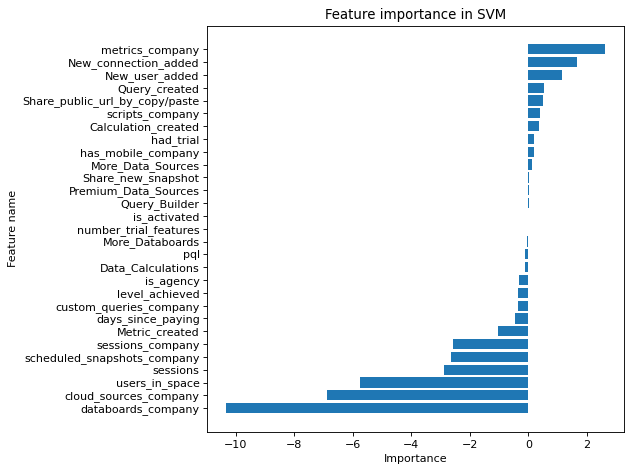

In [22]:



def f_importances(coef, names):
    figure(figsize=(8, 6), dpi=80)

    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xlabel("Importance")
    plt.ylabel("Feature name")
    plt.title("Feature importance in SVM")
    plt.tight_layout()
    plt.savefig("SVM_feature_imp.png", dpi=500)
    plt.show()

features_names = list(X1.columns)
svm = svm.SVC(kernel='linear')
svm.fit(X1, np.ravel(Y1))
f_importances(svm.coef_[0], features_names)

### KNN

In [23]:
"""KNN"""

k_list = list(range(1,40))
f1_1 = []
f1_2 = []
acc_1 = []
acc_2 = []
for k in k_list:
    print("working with k: ", k)
    clf = KNeighborsClassifier(n_neighbors=k)
    scores1 = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
    scores2 = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
    scores3 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
    scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)
    
    f1_1.append(np.mean(scores3))
    f1_2.append(np.mean(scores4))
    acc_1.append(np.mean(scores1))
    acc_2.append(np.mean(scores2))
    
    
    print("#############################################################################")
    print("accuracy score with events and with k= {}: {}".format(k,  np.mean(scores1)) )
    print("accuracy score without events and with k= {}: {}".format(k, np.mean(scores2)))
    print("F1 score with events and with k= {}: {}".format(k,  np.mean(scores3)) )
    print("F1 score without events and with k= {}: {}".format(k, np.mean(scores4)))
print("end")


working with k:  1
#############################################################################
accuracy score with events and with k= 1: 0.5696391252425734
accuracy score without events and with k= 1: 0.5899705179877593
F1 score with events and with k= 1: 0.5785055382403832
F1 score without events and with k= 1: 0.6040834371560939
working with k:  2
#############################################################################
accuracy score with events and with k= 2: 0.5817510076130766
accuracy score without events and with k= 2: 0.5981825645618749
F1 score with events and with k= 2: 0.4837754925988598
F1 score without events and with k= 2: 0.5108770004274941
working with k:  3
#############################################################################
accuracy score with events and with k= 3: 0.5981769667114494
accuracy score without events and with k= 3: 0.6003470667263772
F1 score with events and with k= 3: 0.6135869507719487
F1 score without events and with k= 3: 0.613395855229

#############################################################################
accuracy score with events and with k= 26: 0.6020656068069862
accuracy score without events and with k= 26: 0.6063871473354233
F1 score with events and with k= 26: 0.6129138795453217
F1 score without events and with k= 26: 0.6222159081032392
working with k:  27
#############################################################################
accuracy score with events and with k= 27: 0.6055232124197641
accuracy score without events and with k= 27: 0.6076783848335572
F1 score with events and with k= 27: 0.6313375830535444
F1 score without events and with k= 27: 0.6455343963676252
working with k:  28
#############################################################################
accuracy score with events and with k= 28: 0.6094249141662934
accuracy score without events and with k= 28: 0.6055269443200478
F1 score with events and with k= 28: 0.6198081586120778
F1 score without events and with k= 28: 0.6219689564330351


In [24]:
print("max acc score is: ", max(acc_1))
index = acc_1.index(max(acc_1))
print("at k= ", k_list[index])

clf = KNeighborsClassifier(n_neighbors=k_list[index])
score = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
RESULT_DICT["KNN"] = score
f1 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
F1["KNN"] = f1
print(score)

max acc score is:  0.6094249141662934
at k=  28
[0.61206897 0.61637931 0.5974026  0.62337662 0.5974026  0.5974026
 0.58441558 0.5974026  0.65367965 0.61471861]


### Gaussian Process

In [25]:
"""GAUSSIAN PROCESS - takes very long"""
#kernel = 1.0 * RBF(1.0)
#gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
#print(1)
#scores1 = cross_val_score(gpc, X1, np.ravel(Y1), cv=10)
#print(2)
#scores2 = cross_val_score(gpc, X2, np.ravel(Y2), cv=10)
#scores3 = cross_val_score(gpc, X1, np.ravel(Y1), scoring = "f1", cv=10)
#scores4 = cross_val_score(gpc, X2, np.ravel(Y2), scoring = "f1", cv=10)
    
#f1_1.append(np.mean(scores3))
#f1_2.append(np.mean(scores4))
#acc_1.append(np.mean(scores1))
#acc_2.append(np.mean(scores2))
    
    
#print("#############################################################################")
#print("accuracy score with events: {}".format(np.mean(scores1) ))
#print("accuracy score without events: {}".format(np.mean(scores2) ))
#print("F1 score with events: {}".format(np.mean(scores3)) )
#print("F1 score without events: {}".format(np.mean(scores4)))
#print("end")


'GAUSSIAN PROCESS - takes very long'

### Random Forest

In [26]:
"""RANDOM FOREST"""
k_list = list(range(1,30))
f1_1 = []
f1_2 = []
acc_1 = []
acc_2 = []
for k in k_list:
    print("working with {} trees".format(k))
    clf=RandomForestClassifier(n_estimators=k)
    scores1 = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
    scores2 = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
    scores3 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
    scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)

    f1_1.append(np.mean(scores3))
    f1_2.append(np.mean(scores4))
    acc_1.append(np.mean(scores1))
    acc_2.append(np.mean(scores2))
    
    
    print("#############################################################################")
    print("accuracy score with events and with k= {}: {}".format(k,  np.mean(scores1)) )
    print("accuracy score without events and with k= {}: {}".format(k, np.mean(scores2)))
    print("F1 score with events and with k= {}: {}".format(k,  np.mean(scores3)) )
    print("F1 score without events and with k= {}: {}".format(k, np.mean(scores4)))
print("end")
   


working with 1 trees
#############################################################################
accuracy score with events and with k= 1: 0.6535378414688761
accuracy score without events and with k= 1: 0.6409911927153307
F1 score with events and with k= 1: 0.6591765591130492
F1 score without events and with k= 1: 0.635230152154566
working with 2 trees
#############################################################################
accuracy score with events and with k= 2: 0.6557172712345126
accuracy score without events and with k= 2: 0.6522372742200327
F1 score with events and with k= 2: 0.5849536378205061
F1 score without events and with k= 2: 0.5864173621050427
working with 3 trees
#############################################################################
accuracy score with events and with k= 3: 0.6942062248096732
accuracy score without events and with k= 3: 0.680334751455441
F1 score with events and with k= 3: 0.685761214728143
F1 score without events and with k= 3: 0.680339572

#############################################################################
accuracy score with events and with k= 26: 0.750427302582475
accuracy score without events and with k= 26: 0.7305138826690551
F1 score with events and with k= 26: 0.7225526389073831
F1 score without events and with k= 26: 0.7206120840601541
working with 27 trees
#############################################################################
accuracy score with events and with k= 27: 0.7482739961188238
accuracy score without events and with k= 27: 0.7409016271085236
F1 score with events and with k= 27: 0.7464059246650486
F1 score without events and with k= 27: 0.7327223964472436
working with 28 trees
#############################################################################
accuracy score with events and with k= 28: 0.7530247051798776
accuracy score without events and with k= 28: 0.7326839826839827
F1 score with events and with k= 28: 0.7333610780575367
F1 score without events and with k= 28: 0.71696524581954

In [27]:
print("max acc score is: ", max(acc_1))
index = acc_1.index(max(acc_1))
print("at k= ", k_list[index])
print("with f1 score: ", f1_1[index])

clf=RandomForestClassifier(n_estimators=k_list[index])
score = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
RESULT_DICT["RandomForest"] = score
f1 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
F1["RandomForest"] = f1
print(score)

max acc score is:  0.7530247051798776
at k=  28
with f1 score:  0.7333610780575367
[0.74137931 0.76293103 0.73160173 0.73160173 0.71428571 0.76190476
 0.77056277 0.80952381 0.74025974 0.74891775]


In [28]:
clf=RandomForestClassifier(n_estimators=k_list[index]) #max
clf.fit(X1, np.ravel(Y1))
value= clf.feature_importances_
feature = list(X1.columns)

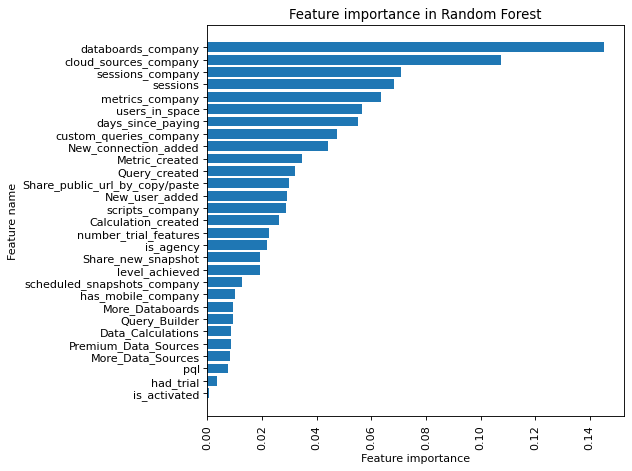

In [29]:
z = list(zip(value,feature))

z.sort()

value = [v for (v,f) in z]
feature = [f for (v,f) in z]
figure(figsize=(8, 6), dpi=80)

plt.barh(feature,value)
plt.xticks(rotation=90)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.title("Feature importance in Random Forest")
plt.tight_layout()
plt.savefig("RandomForest_feature_imp.png", dpi=500)
plt.show()


### Naive Bayes

In [30]:
"""NAIVE BAYES"""

gnb = GaussianNB()
scores1 = cross_val_score(gnb, X1, np.ravel(Y1), cv=10)
scores2 = cross_val_score(gnb, X2, np.ravel(Y2), cv=10)
scores3 = cross_val_score(gnb, X1, np.ravel(Y1), scoring = "f1", cv=10)
scores4 = cross_val_score(gnb, X2, np.ravel(Y2), scoring = "f1", cv=10)
    
print("accuracy score with events: {}".format(np.mean(scores1) ))
print("accuracy score without events: {}".format(np.mean(scores2) ))
print("F1 score with events: {}".format(np.mean(scores3)) )
print("F1 score without events: {}".format(np.mean(scores4)))


RESULT_DICT["NaiveBayes"] = scores1
F1["NaiveBayes"] = scores3
print(scores1)

accuracy score with events: 0.6194077474249887
accuracy score without events: 0.64491341991342
F1 score with events: 0.694092950646597
F1 score without events: 0.7126327777315109
[0.59913793 0.56896552 0.62770563 0.64935065 0.58441558 0.65800866
 0.62337662 0.65367965 0.6017316  0.62770563]


### Results

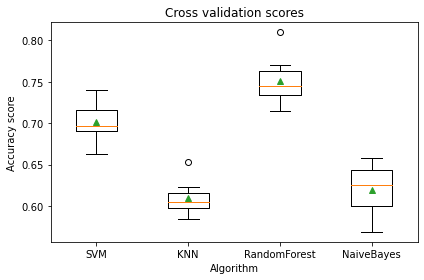

In [31]:
RESULT_DICT
fig, ax = plt.subplots()
ax.boxplot(RESULT_DICT.values(), showmeans=True)
ax.set_xticklabels(RESULT_DICT.keys())
plt.tight_layout()
plt.xlabel("Algorithm")
plt.ylabel("Accuracy score")
plt.title("Cross validation scores")
plt.tight_layout()

plt.savefig("problem_1_boxplot.png", dpi=300)
plt.show()

In [32]:
F1

{'SVM': array([0.73722628, 0.73062731, 0.74906367, 0.73003802, 0.7       ,
        0.743083  , 0.77272727, 0.75095785, 0.7250996 , 0.73003802]),
 'KNN': array([0.61864407, 0.63967611, 0.60085837, 0.62008734, 0.61087866,
        0.60425532, 0.59663866, 0.59030837, 0.68      , 0.63673469]),
 'RandomForest': array([0.71929825, 0.76190476, 0.7027027 , 0.73873874, 0.71493213,
        0.75238095, 0.76785714, 0.77678571, 0.72380952, 0.75770925]),
 'NaiveBayes': array([0.70096463, 0.67320261, 0.70547945, 0.65236052, 0.66896552,
        0.72473868, 0.70103093, 0.72222222, 0.68055556, 0.7114094 ])}

## Problem 2: Became paying

### Data celaning and preprocessing

In [33]:
data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,is_activated,level_achieved,...,sessions,number_trial_features,Query_Builder,Data_Calculations,More_Data_Sources,More_Databoards,Premium_Data_Sources,paying,pql,had_cancelled
0,142868,South Africa,1,2019-11-29T11:30:00,undefined,undefined,undefined,0,1,0,...,0.0,0,0,0,0,0,0,0,0,0
1,143012,Canada,0,2019-11-30T22:14:00,undefined,undefined,undefined,0,1,0,...,0.0,0,0,0,0,0,0,0,0,0
2,143074,Spain,0,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,1,1,3,...,904.0,2,0,0,1,1,0,1,1,0
3,143438,France,0,2019-12-03T14:02:00,undefined,undefined,undefined,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4,144226,Italy,0,2019-12-07T19:03:00,undefined,undefined,undefined,0,1,0,...,0.0,0,0,0,0,0,0,0,0,0


In [34]:
data = data[data["is_activated"]==1] #to remove those who maybe came just one time to see the page
data = data.drop(columns=['company_created', 'became_paying', 'became_pql', 'cancelled']) #removing some not needed columns


data.dtypes

distinct_id                         int64
country                            object
is_agency                           int32
had_trial                           int32
is_activated                        int32
level_achieved                      int32
has_mobile_company                  int32
sessions_company                    int64
databoards_company                  int64
cloud_sources_company               int64
metrics_company                     int64
users_in_space                      int64
scheduled_snapshots_company         int64
custom_queries_company              int64
scripts_company                     int64
Calculation_created               float64
Metric_created                    float64
New_connection_added              float64
New_user_added                    float64
Query_created                     float64
Share_new_snapshot                float64
Share_public_url_by_copy/paste    float64
sessions                          float64
number_trial_features             

In [35]:
data = data.drop(columns=["country", "distinct_id"]) #removing some more columns
data

,is_agency,had_trial,is_activated,level_achieved,has_mobile_company,sessions_company,databoards_company,cloud_sources_company,metrics_company,users_in_space,...,sessions,number_trial_features,Query_Builder,Data_Calculations,More_Data_Sources,More_Databoards,Premium_Data_Sources,paying,pql,had_cancelled
0,1,0,1,0,0,1,0,1,9,1,...,0.0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,7,1,3,37,1,...,0.0,0,0,0,0,0,0,0,0,0
2,0,1,1,3,1,979,10,10,7,4,...,904.0,2,0,0,1,1,0,1,1,0
4,0,0,1,0,0,1,1,1,13,1,...,0.0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,16,1,2,9,1,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101686,0,0,1,0,0,3,1,1,7,1,...,0.0,0,0,0,0,0,0,0,0,0
101688,0,0,1,0,0,3,1,1,0,1,...,0.0,0,0,0,0,0,0,0,0,0
101690,0,0,1,0,0,1,0,1,0,1,...,0.0,0,0,0,0,0,0,0,0,0
101691,0,0,1,0,0,2,1,1,0,1,...,0.0,0,0,0,0,0,0,0,0,0


In [36]:
data = data.drop(columns=["pql"]) #removing pql  as pql is already made estimator from databox
data

,is_agency,had_trial,is_activated,level_achieved,has_mobile_company,sessions_company,databoards_company,cloud_sources_company,metrics_company,users_in_space,...,Share_public_url_by_copy/paste,sessions,number_trial_features,Query_Builder,Data_Calculations,More_Data_Sources,More_Databoards,Premium_Data_Sources,paying,had_cancelled
0,1,0,1,0,0,1,0,1,9,1,...,0.0,0.0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,7,1,3,37,1,...,0.0,0.0,0,0,0,0,0,0,0,0
2,0,1,1,3,1,979,10,10,7,4,...,52.0,904.0,2,0,0,1,1,0,1,0
4,0,0,1,0,0,1,1,1,13,1,...,0.0,0.0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,16,1,2,9,1,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101686,0,0,1,0,0,3,1,1,7,1,...,0.0,0.0,0,0,0,0,0,0,0,0
101688,0,0,1,0,0,3,1,1,0,1,...,0.0,0.0,0,0,0,0,0,0,0,0
101690,0,0,1,0,0,1,0,1,0,1,...,0.0,0.0,0,0,0,0,0,0,0,0
101691,0,0,1,0,0,2,1,1,0,1,...,7.0,0.0,0,0,0,0,0,0,0,0


In [37]:
data = data.drop(columns=["is_activated"])
data[["paying"]].value_counts()

paying
0         49869
1          2933
dtype: int64

In [38]:
had_trial = data.copy() #looking at only those who had trial
had_trial = had_trial[had_trial["had_trial"]==1]
had_trial = had_trial.drop(columns=["had_trial"])

In [39]:
had_trial[["paying"]].value_counts() #lost only 4% of paying but 75% of non-paying

paying
0         12772
1          2792
dtype: int64

### Sampling

In [40]:

s0 = had_trial.paying[had_trial.paying.eq(0)].sample(2792).index
s1 = had_trial.paying[had_trial.paying.eq(1)].sample(2792).index 

had_trial = had_trial.loc[s0.union(s1)]
#had_trial

s0 = data.paying[data.paying.eq(0)].sample(2933).index
s1 = data.paying[data.paying.eq(1)].sample(2933).index 

data = data.loc[s0.union(s1)]


### Scaling

In [41]:
"""SCALING"""


min_max_scaler = preprocessing.MinMaxScaler() #scale from 0 to 1

col1 = list(had_trial.columns)
col2 = list(data.columns)

x1 = had_trial.values #returns a numpy array
had_trial_scaled = min_max_scaler.fit_transform(x1)
had_trial = pd.DataFrame(had_trial_scaled)


x2 = data.values #returns a numpy array
data_scaled = min_max_scaler.fit_transform(x2)
data = pd.DataFrame(data_scaled)


had_trial.columns=col1
data.columns=col2



In [42]:
data = data.drop(columns=["had_cancelled"]) #indicator that was paying!!!!
had_trial = had_trial.drop(columns=["had_cancelled"])

In [43]:
X1 = had_trial.drop(columns=["paying"])
Y1 = had_trial[["paying"]]

X2 = data.drop(columns=["paying"])
Y2 = data[["paying"]]

In [44]:
RESULT_DICT_had_trial = {}
RESULT_DICT_DATA = {}
F1 = {}

### Support Vector Machine

In [45]:
"""SVM"""
from sklearn import svm

kernels = ["linear", "poly", "rbf", "sigmoid"]
f1_1 = []
f1_2 = []
acc_1 = []
acc_2 = []
for k in kernels:
    print("working with kernel", k)
    clf = svm.SVC(kernel=k) #changing degree at kernel=poly does not help
    scores1 = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
    scores2 = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
    scores3 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
    scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)
    f1_1.append(np.mean(scores3))
    f1_2.append(np.mean(scores4))
    acc_1.append(np.mean(scores1))
    acc_2.append(np.mean(scores2))
    print("#############################################################################")
    print("accuracy score had_trial and with kernel {}: {}".format(k,  np.mean(scores1)) )
    print("accuracy score without filtering and with kernel {}: {}".format(k, np.mean(scores2)))
    print("F1 score had_trial and with kernel {}: {}".format(k,  np.mean(scores3)) )
    print("F1 score without filtering and with kernel {}: {}".format(k, np.mean(scores4)))

working with kernel linear
#############################################################################
accuracy score had_trial and with kernel linear: 0.8604930078673514
accuracy score without filtering and with kernel linear: 0.9096539935229171
F1 score had_trial and with kernel linear: 0.8516780971400081
F1 score without filtering and with kernel linear: 0.9114128900487156
working with kernel poly
#############################################################################
accuracy score had_trial and with kernel poly: 0.8219913952847187
accuracy score without filtering and with kernel poly: 0.898575506857917
F1 score had_trial and with kernel poly: 0.8055271061636524
F1 score without filtering and with kernel poly: 0.8989556917035525
working with kernel rbf
#############################################################################
accuracy score had_trial and with kernel rbf: 0.8339895871403747
accuracy score without filtering and with kernel rbf: 0.8941427167700635
F1 score 

In [46]:
print("max acc score had_trial is: ", max(acc_1))
print("max acc score all_data is: ", max(acc_2))

clf = svm.SVC(kernel="linear") # kernel with best result
score  = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
RESULT_DICT_had_trial["SVM"] = score


clf = svm.SVC(kernel="linear") # kernel with best result
score  = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
RESULT_DICT["SVM"] = score
scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)

F1["SVM"] = scores4
print(score)

max acc score had_trial is:  0.8604930078673514
max acc score all_data is:  0.9096539935229171
[0.879046   0.9165247  0.89437819 0.91311755 0.90971039 0.91482112
 0.92491468 0.92662116 0.9112628  0.90614334]


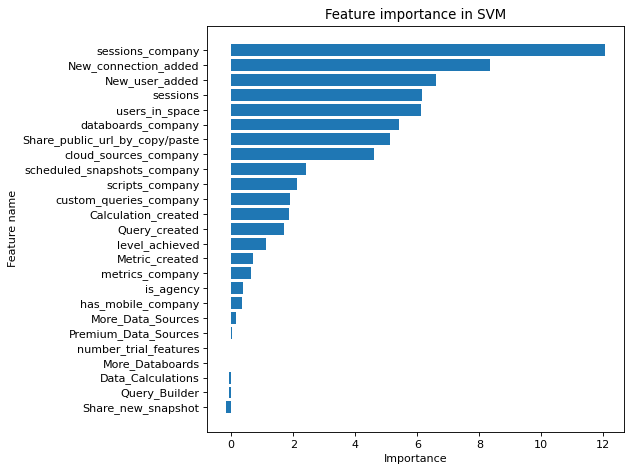

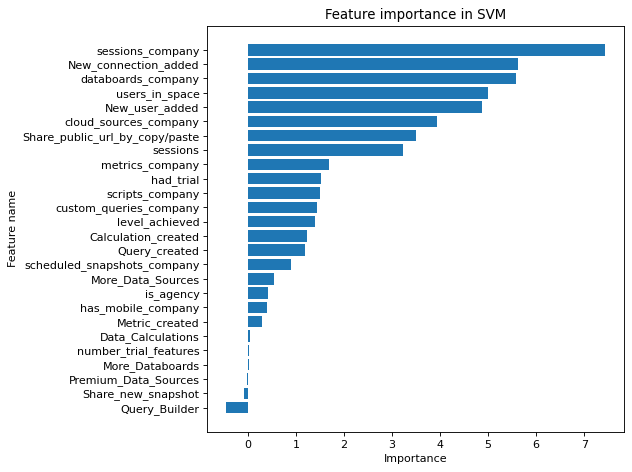

In [47]:
from sklearn import svm

def f_importances_1(coef, names):
    figure(figsize=(8, 6), dpi=80)

    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xlabel("Importance")
    plt.ylabel("Feature name")
    plt.title("Feature importance in SVM")
    plt.tight_layout()
    plt.savefig("SVM_feature_imp_had_trial.png", dpi=500)
    plt.show()

    
    
    
features_names = list(X1.columns)
svm = svm.SVC(kernel='linear')
svm.fit(X1, np.ravel(Y1))
f_importances_1(svm.coef_[0], features_names)



from sklearn import svm


def f_importances_2(coef, names):
    figure(figsize=(8, 6), dpi=80)

    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xlabel("Importance")
    plt.ylabel("Feature name")
    plt.title("Feature importance in SVM")
    plt.tight_layout()
    plt.savefig("SVM_feature_imp_all_data.png", dpi=500)
    plt.show()

features_names = list(X2.columns)
svm = svm.SVC(kernel='linear')
svm.fit(X2, np.ravel(Y2))
f_importances_2(svm.coef_[0], features_names)

### KNN

In [48]:
"""KNN"""

k_list = list(range(1,40))
f1_1 = []
f1_2 = []
acc_1 = []
acc_2 = []
for k in k_list:
    print("working with k: ", k)
    clf = KNeighborsClassifier(n_neighbors=k)
    scores1 = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
    scores2 = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
    scores3 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
    scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)
    
    f1_1.append(np.mean(scores3))
    f1_2.append(np.mean(scores4))
    acc_1.append(np.mean(scores1))
    acc_2.append(np.mean(scores2))
    
    
    print("#############################################################################")
    print("accuracy score with had_trial and with k= {}: {}".format(k,  np.mean(scores1)) )
    print("accuracy score without filtering and with k= {}: {}".format(k, np.mean(scores2)))
    print("F1 score with had_trial and with k= {}: {}".format(k,  np.mean(scores3)) )
    print("F1 score without filtering and with k= {}: {}".format(k, np.mean(scores4)))
print("end")

working with k:  1
#############################################################################
accuracy score with had_trial and with k= 1: 0.8022960868422235
accuracy score without filtering and with k= 1: 0.8910742422568623
F1 score with had_trial and with k= 1: 0.7924792899892417
F1 score without filtering and with k= 1: 0.8880038934829482
working with k:  2
#############################################################################
accuracy score with had_trial and with k= 2: 0.7868922358794826
accuracy score without filtering and with k= 2: 0.8663528905582268
F1 score with had_trial and with k= 2: 0.7478909165624051
F1 score without filtering and with k= 2: 0.8534410607219703
working with k:  3
#############################################################################
accuracy score with had_trial and with k= 3: 0.8216352164964318
accuracy score without filtering and with k= 3: 0.905562500363391
F1 score with had_trial and with k= 3: 0.8098869123003622
F1 score without filt

#############################################################################
accuracy score with had_trial and with k= 25: 0.8065907502516655
accuracy score without filtering and with k= 25: 0.8938031641190527
F1 score with had_trial and with k= 25: 0.7926229924018358
F1 score without filtering and with k= 25: 0.8944930636756521
working with k:  26
#############################################################################
accuracy score with had_trial and with k= 26: 0.8028301947281692
accuracy score without filtering and with k= 26: 0.8909050473571293
F1 score with had_trial and with k= 26: 0.7849354663834599
F1 score without filtering and with k= 26: 0.8911072167442488
working with k:  27
#############################################################################
accuracy score with had_trial and with k= 27: 0.8042626041125664
accuracy score without filtering and with k= 27: 0.8944831415597327
F1 score with had_trial and with k= 27: 0.7904442724389967
F1 score without filtering

In [49]:
print("max had_trial acc score is: ", max(acc_1))
index = acc_1.index(max(acc_1))
print("at k= ", k_list[index])

clf = KNeighborsClassifier(n_neighbors=k_list[index])
score = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
RESULT_DICT_had_trial["KNN"] = score



print("max all data acc score is: ", max(acc_2))
index = acc_2.index(max(acc_2))
print("at k= ", k_list[index])

clf = KNeighborsClassifier(n_neighbors=k_list[index])
score = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
RESULT_DICT["KNN"] = score

scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)
F1["KNN"] = scores4

max had_trial acc score is:  0.8236052602894313
at k=  5
max all data acc score is:  0.9064125448424628
at k=  5


### Random Forest

In [50]:
"""RANDOM FOREST"""
k_list = list(range(1,50))
f1_1 = []
f1_2 = []
acc_1 = []
acc_2 = []
for k in k_list:
    print("working with {} trees".format(k))
    clf=RandomForestClassifier(n_estimators=k)
    scores1 = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
    scores2 = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
    scores3 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
    scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)

    f1_1.append(np.mean(scores3))
    f1_2.append(np.mean(scores4))
    acc_1.append(np.mean(scores1))
    acc_2.append(np.mean(scores2))
    
    
    print("#############################################################################")
    print("accuracy score with had_trial and with k= {}: {}".format(k,  np.mean(scores1)) )
    print("accuracy score without filtering and with k= {}: {}".format(k, np.mean(scores2)))
    print("F1 score with had_trial and with k= {}: {}".format(k,  np.mean(scores3)) )
    print("F1 score without filtering and with k= {}: {}".format(k, np.mean(scores4)))
print("end")

working with 1 trees
#############################################################################
accuracy score with had_trial and with k= 1: 0.8295173152262425
accuracy score without filtering and with k= 1: 0.9101618689350024
F1 score with had_trial and with k= 1: 0.8395605719581744
F1 score without filtering and with k= 1: 0.908924096890467
working with 2 trees
#############################################################################
accuracy score with had_trial and with k= 2: 0.8246763613980418
accuracy score without filtering and with k= 2: 0.9019759754870893
F1 score with had_trial and with k= 2: 0.8142184988630777
F1 score without filtering and with k= 2: 0.8923119873916138
working with 3 trees
#############################################################################
accuracy score with had_trial and with k= 3: 0.8565529202813524
accuracy score without filtering and with k= 3: 0.9294236326319402
F1 score with had_trial and with k= 3: 0.8617985578385617
F1 score withou

#############################################################################
accuracy score with had_trial and with k= 25: 0.886465206045101
accuracy score without filtering and with k= 25: 0.9405053171386875
F1 score with had_trial and with k= 25: 0.8812854118546672
F1 score without filtering and with k= 25: 0.9435385753992348
working with 26 trees
#############################################################################
accuracy score with had_trial and with k= 26: 0.8828806560614513
accuracy score without filtering and with k= 26: 0.9396544005209574
F1 score with had_trial and with k= 26: 0.8851677844958143
F1 score without filtering and with k= 26: 0.9397324842778882
working with 27 trees
#############################################################################
accuracy score with had_trial and with k= 27: 0.8821618866255025
accuracy score without filtering and with k= 27: 0.942721130756842
F1 score with had_trial and with k= 27: 0.885982931640488
F1 score without filterin

#############################################################################
accuracy score with had_trial and with k= 49: 0.8832371554427068
accuracy score without filtering and with k= 49: 0.9406780005930544
F1 score with had_trial and with k= 49: 0.8870347352445391
F1 score without filtering and with k= 49: 0.9410925479240339
end


max had_trial acc score is:  0.888611255377947
at k=  35
with f1 score:  0.8824537831265357


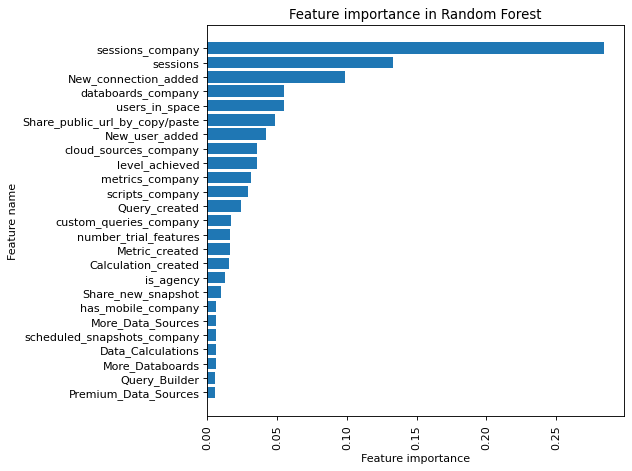

In [51]:
print("max had_trial acc score is: ", max(acc_1))
index = acc_1.index(max(acc_1))
print("at k= ", k_list[index])
print("with f1 score: ", f1_1[index])

clf=RandomForestClassifier(n_estimators=k_list[index])
score = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
RESULT_DICT_had_trial["RandomForest"] = score

clf=RandomForestClassifier(n_estimators=k_list[index]) #max
clf.fit(X1, np.ravel(Y1))
value= clf.feature_importances_
feature = list(X1.columns)

z = list(zip(value,feature))

z.sort()

value = [v for (v,f) in z]
feature = [f for (v,f) in z]
figure(figsize=(8, 6), dpi=80)

plt.barh(feature,value)
plt.xticks(rotation=90)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.title("Feature importance in Random Forest")
plt.tight_layout()
plt.savefig("RandomForest_feature_had_trial_imp.png", dpi=500)
plt.show()




max  acc score without filtering is:  0.9430630091109418
at k=  44
with f1 score:  0.9427133061011521


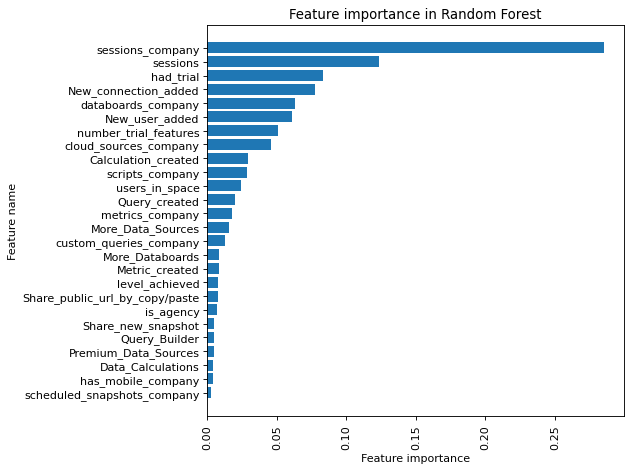

In [52]:
print("max  acc score without filtering is: ", max(acc_2))
index = acc_2.index(max(acc_2))
print("at k= ", k_list[index])
print("with f1 score: ", f1_2[index])

clf=RandomForestClassifier(n_estimators=k_list[index])
score = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
RESULT_DICT["RandomForest"] = score
score = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)
F1["RandomForest"] = score
clf=RandomForestClassifier(n_estimators=k_list[index]) #max
clf.fit(X2, np.ravel(Y2))
value= clf.feature_importances_
feature = list(X2.columns)

z = list(zip(value,feature))

z.sort()

value = [v for (v,f) in z]
feature = [f for (v,f) in z]
figure(figsize=(8, 6), dpi=80)

plt.barh(feature,value)
plt.xticks(rotation=90)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.title("Feature importance in Random Forest")
plt.tight_layout()
plt.savefig("RandomForest_feature_all_data_imp.png", dpi=500)
plt.show()





### Naive Bayes

In [53]:
"""NAIVE BAYES"""

gnb = GaussianNB()
scores1 = cross_val_score(gnb, X1, np.ravel(Y1), cv=10)
scores2 = cross_val_score(gnb, X2, np.ravel(Y2), cv=10)
scores3 = cross_val_score(gnb, X1, np.ravel(Y1), scoring = "f1", cv=10)
scores4 = cross_val_score(gnb, X2, np.ravel(Y2), scoring = "f1", cv=10)
    
print("accuracy score with had_trial : {}".format(np.mean(scores1) ))
print("accuracy score without filtering : {}".format(np.mean(scores2) ))
print("F1 score with had_trial: {}".format(np.mean(scores3)) )
print("F1 score without filtering: {}".format(np.mean(scores4)))


RESULT_DICT_had_trial["NaiveBayes"] = scores1
RESULT_DICT["NaiveBayes"] = scores2
F1["NaiveBayes"] = scores4
print(scores1)

accuracy score with had_trial : 0.8293377831637396
accuracy score without filtering : 0.8963567861109013
F1 score with had_trial: 0.8046457089639422
F1 score without filtering: 0.8887957449099085
[0.82110912 0.83184258 0.82468694 0.81753131 0.83333333 0.86021505
 0.82795699 0.82258065 0.84229391 0.81182796]


### Results

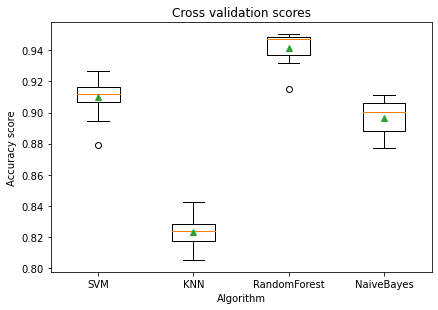

In [54]:
fig, ax = plt.subplots()
ax.boxplot(RESULT_DICT.values(), showmeans=True)
ax.set_xticklabels(RESULT_DICT.keys())
plt.tight_layout()
plt.xlabel("Algorithm")
plt.ylabel("Accuracy score")
plt.title("Cross validation scores")
plt.savefig("problem_2_boxplot_all_data.png", dpi=300)
plt.show()

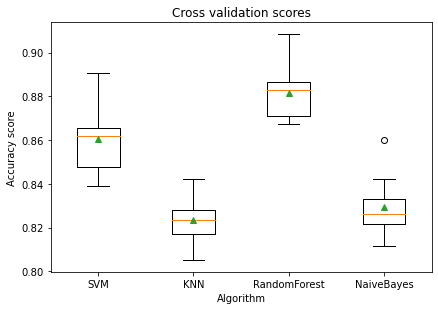

In [55]:
fig, ax = plt.subplots()
ax.boxplot(RESULT_DICT_had_trial.values(), showmeans=True)
ax.set_xticklabels(RESULT_DICT_had_trial.keys())
plt.tight_layout()
plt.xlabel("Algorithm")
plt.ylabel("Accuracy score")
plt.title("Cross validation scores")
plt.savefig("problem_2_boxplot_had_trial.png", dpi=300)
plt.show()

In [56]:
F1

{'SVM': array([0.88186356, 0.91764706, 0.8990228 , 0.91625616, 0.91032149,
        0.91438356, 0.92592593, 0.92821369, 0.91419142, 0.90630324]),
 'KNN': array([0.88541667, 0.91566265, 0.89464594, 0.89845095, 0.9100346 ,
        0.90940767, 0.91578947, 0.90909091, 0.91780822, 0.89279438]),
 'RandomForest': array([0.92      , 0.95286195, 0.93687708, 0.93877551, 0.94772344,
        0.94501718, 0.94482759, 0.94256757, 0.94932432, 0.93174061]),
 'NaiveBayes': array([0.866171  , 0.87956204, 0.86813187, 0.88644689, 0.9005425 ,
        0.89981785, 0.89945155, 0.90545455, 0.90252708, 0.87985213])}